# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [46]:
# Resolver acá
import pandas as pd
import os # Exportamos este módulo para trabajar con carpetas
import csv

base_dir = os.getcwd() # Construye la ruta relativa al archivo CSV desde el directorio actual
csv_path = os.path.join(base_dir, 'Base Airbnb NY.csv')

df_airbnb = pd.read_csv(csv_path)
df_airbnb

df_airbnb=df_airbnb.drop(columns=['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'last_review'])
df_airbnb.head(3)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150.0,3,0,NaN,1,365


In [4]:
print(df_airbnb.isnull().sum())

df_airbnb.fillna(df_airbnb.select_dtypes(include=['number']).median(), inplace=True) #Reemplazamos datos nulos con la mediana
print(df_airbnb.isnull().sum())

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10053
calculated_host_listings_count        0
availability_365                      0
dtype: int64
neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [12]:
# CAMBIO DE VARIABLE A NUMERICA (HAY QUE VER PORQUE NO VA A FUNCIONAR LA ORDINALIDAD
neighbourhood_mapping = {neighbourhood: idx for idx, neighbourhood in enumerate(df_airbnb['neighbourhood_group'].unique())}
df_airbnb['neighbourhood_group'] = df_airbnb['neighbourhood_group'].map(neighbourhood_mapping)

# Mapeo manual para 'room_type'
room_mapping = {room_type: idx for idx, room_type in enumerate(df_airbnb['room_type'].unique())}
df_airbnb['room_type'] = df_airbnb['room_type'].map(room_mapping)

# Mostrar los mapeos
print("Mapping de 'neighbourhood_group':", neighbourhood_mapping)
print("Mapping de 'room_type':", room_mapping)

Mapping de 'neighbourhood_group': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
Mapping de 'room_type': {0: 0, 1: 1, 2: 2}


In [14]:
# SI SACAMOS OUTLIERS DIRECTAMENTE (HAY QUE VER SI LOS SACAMOS O LO DEJAMOS)

df_airbnb_cleaned = df_airbnb[~df_airbnb.index.isin(outliers_multiple_indices)]

# Verificar el tamaño del nuevo DataFrame
print(f"Número de filas después de eliminar outliers: {df_airbnb_cleaned.shape[0]}")

NameError: name 'outliers_multiple_indices' is not defined

In [16]:
# Cantidad de oferentes por “Neighbourhood group”.

offer_counts = df_airbnb.groupby('neighbourhood_group').size().reset_index(name='offer_group')

# Paso 2: Unir los conteos al DataFrame original
df_airbnb = df_airbnb.merge(offer_counts, on='neighbourhood_group', how='left')

# Mostrar el DataFrame resultante
print(df_airbnb[['neighbourhood_group', 'offer_group']].head())

KeyError: "['offer_group'] not in index"

### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

In [18]:
# Resolver acá 
# EL PROBLEMA DE ESTE ES QUE LAS VARIABLES ANTES CATEGORICAS AHORA NUMERICAS SE ORDENAN. HAY Q EVITAR ESO

 # Reemplaza con tus columnas numéricas
print(df_airbnb.corr())

                                neighbourhood_group  latitude  longitude  \
neighbourhood_group                        1.000000  0.532846   0.281686   
latitude                                   0.532846  1.000000   0.084761   
longitude                                  0.281686  0.084761   1.000000   
room_type                                 -0.004371 -0.002694  -0.160589   
price                                      0.002722  0.033950  -0.150008   
minimum_nights                            -0.000739  0.024861  -0.062730   
number_of_reviews                          0.011476 -0.015368   0.059063   
reviews_per_month                          0.100823 -0.010139   0.145931   
calculated_host_listings_count             0.044511  0.019514  -0.114699   
availability_365                           0.121283 -0.010602   0.080341   
offer_group_x                             -0.728394 -0.038169  -0.573156   
offer_group_y                             -0.728394 -0.038169  -0.573156   

           

#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

In [ ]:
# Resolver acá


#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

In [ ]:
# Resolver acá


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

In [1]:
# Resolver acá


#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [1]:
# Resolver acá


### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [54]:
# Resolver acá
import numpy as np
import pandas as pd

# Copia dataframe original
df_airbnb_outliers = df_airbnb.copy()

# Seleccionar columnas numericas
numeric_columnas = df_airbnb_outliers.select_dtypes(include='number').columns

# Diccionario para outliers detectados
outliers_detectados = {}

# IQR y los limites para cada columna
for columna in numeric_columnas:
    q1 = df_airbnb_outliers[columna].quantile(0.25)  # Primer cuartil
    q3 = df_airbnb_outliers[columna].quantile(0.75)  # Tercer cuartil
    iqr = q3 - q1  # Rango intercuartílico

    # Definir limites inferior y superior
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    # Identificar outliers
    outliers_detectados[columna] = df_airbnb_outliers[(df_airbnb_outliers[columna] < limite_inferior) | 
                                                      (df_airbnb_outliers[columna] > limite_superior)][columna]

# Mostrar outliers identificados para cada columna
for columna, valores_outliers in outliers_detectados.items():
    print(f"Outliers en la columna '{columna}':")
    print(valores_outliers)
    print("\n")

# Eliminar outliers del dataframe
for columna in numeric_columnas:
    q1 = df_airbnb_outliers[columna].quantile(0.25)
    q3 = df_airbnb_outliers[columna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    # Filtrar valores dentro de los limites
    df_airbnb_outliers = df_airbnb_outliers[(df_airbnb_outliers[columna] >= limite_inferior) & 
                                            (df_airbnb_outliers[columna] <= limite_superior)]

# Mostrar el dataframe sin outliers
print("Dataframe después de eliminar outliers:")
print(df_airbnb_outliers)


Outliers en la columna 'latitude':
261      40.88057
433      40.89747
737      40.89557
966      40.87991
1010     40.57810
           ...   
48441    40.56506
48516    40.57936
48699    40.57531
48751    40.56546
48799    40.54179
Name: latitude, Length: 425, dtype: float64


Outliers en la columna 'longitude':
143     -73.83168
169     -74.08088
196     -73.76597
249     -74.08537
250     -74.08543
           ...   
48847   -73.86523
48851   -73.86591
48858   -73.82556
48866   -73.81448
48889   -73.80844
Name: longitude, Length: 2833, dtype: float64


Outliers en la columna 'price':
61       375.0
85       800.0
103      500.0
114      350.0
121      400.0
         ...  
48758    350.0
48833    475.0
48839    800.0
48842    350.0
48856    345.0
Name: price, Length: 2972, dtype: float64


Outliers en la columna 'minimum_nights':
6        45
14       90
29       14
36       60
45       29
         ..
48810    30
48843    29
48871    29
48879    20
48882    20
Name: minimum_nights, Len

#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [72]:
# Resolver acá
from sklearn.model_selection import train_test_split

# Crear columna de 1
intercepto = np.ones((df_airbnb_outliers.shape[0], 1))  # Columna de 1
X = df_airbnb_outliers.drop(columns=['price'])  # Seleccion variables independientes
X = np.concatenate((intercepto, X.values), axis=1)  # Unir columna de 1 con el resto de las variables

# Definir variable dependiente (y) como 'price'
y = df_airbnb_outliers['price'].values  # Variable dependiente

# Dividir datos en conjunto de entrenamiento (70%) y conjunto de prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

# Verificar tamaño de los conjuntos de entrenamiento y prueba
print(f"Número de observaciones en el conjunto de entrenamiento: {X_train.shape[0]}")  # 70% de los datos
print(f"Número de observaciones en el conjunto de prueba: {X_test.shape[0]}")  # 30% de los datos


Número de observaciones en el conjunto de entrenamiento: 34233
Número de observaciones en el conjunto de prueba: 14672


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

Coeficientes: [-1.35823581e+02 -4.83808934e+02 -1.06676155e-01 -1.77439836e-01
 -2.61383455e-01 -7.46268228e-02  1.69108923e-01 -1.70606172e+01
  3.00147504e+01  9.51465739e+00 -1.47770909e+02 -9.97109669e+01
 -1.32995989e+02]
Intercepto: -30074.63004626571
Error Cuadrático Medio: 35377.8962169837
R^2: 0.11575888977779913
El modelo tiene un ajuste moderado.


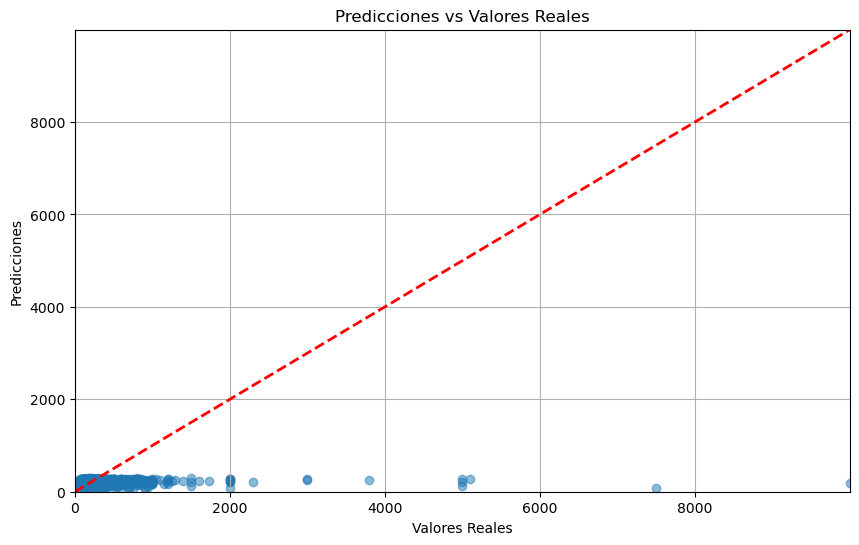

In [82]:
# Resolver acá
!pip install pandas numpy scikit-learn matplotlib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Asumiendo que df_airbnb_outliers ya está definido y no tiene NaN
df_airbnb_outliers.dropna(inplace=True)  # Asegurarse de eliminar NaN

# Definir la variable dependiente (y) y las variables independientes (X)
y = df_airbnb_outliers['price']  # Variable dependiente
X = df_airbnb_outliers.drop(columns=['price'])  # Variables independientes

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

# Ajustar el modelo a los datos de entrenamiento
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Resultados del modelo
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio: {mse}")
print(f"R^2: {r2}")

# Comentarios sobre los resultados
if r2 < 0.1:
    print("El modelo no está capturando la varianza en los datos.")
elif r2 < 0.5:
    print("El modelo tiene un ajuste moderado.")
else:
    print("El modelo explica una buena proporción de la varianza en los datos.")

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid()
plt.show()
